In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DF = pd.read_csv("http://facweb.cs.depaul.edu/mobasher/classes/csc478/data/term-doc-mat.csv", header=None)
DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,database,24,32,12,6,43,2,0,3,1,6,4,0,0,0,0
1,index,9,5,5,2,20,0,1,0,0,0,27,14,3,2,11
2,likelihood,0,3,0,0,3,7,12,4,27,4,0,1,0,0,0
3,linear,3,0,0,0,0,16,0,2,25,23,7,12,21,3,2
4,matrix,1,0,0,0,0,33,2,0,7,12,14,5,12,4,0
5,query,12,2,0,0,27,0,0,0,0,22,9,4,0,5,3
6,regression,0,0,0,0,0,18,32,22,34,17,0,0,0,0,0
7,retrieval,1,0,0,0,2,0,0,0,3,9,27,7,5,4,4
8,sql,21,10,16,7,31,0,0,0,0,0,0,0,0,1,0
9,vector,2,0,0,2,0,27,4,2,11,8,33,16,14,7,3


In [3]:
# TD将是termx document矩阵
TD = DF.iloc[:,1:]
TD

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,24,32,12,6,43,2,0,3,1,6,4,0,0,0,0
1,9,5,5,2,20,0,1,0,0,0,27,14,3,2,11
2,0,3,0,0,3,7,12,4,27,4,0,1,0,0,0
3,3,0,0,0,0,16,0,2,25,23,7,12,21,3,2
4,1,0,0,0,0,33,2,0,7,12,14,5,12,4,0
5,12,2,0,0,27,0,0,0,0,22,9,4,0,5,3
6,0,0,0,0,0,18,32,22,34,17,0,0,0,0,0
7,1,0,0,0,2,0,0,0,3,9,27,7,5,4,4
8,21,10,16,7,31,0,0,0,0,0,0,0,0,1,0
9,2,0,0,2,0,27,4,2,11,8,33,16,14,7,3


In [4]:
# ：重新索引列，使其从0开始
TD.columns= range(15)
TD

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,24,32,12,6,43,2,0,3,1,6,4,0,0,0,0
1,9,5,5,2,20,0,1,0,0,0,27,14,3,2,11
2,0,3,0,0,3,7,12,4,27,4,0,1,0,0,0
3,3,0,0,0,0,16,0,2,25,23,7,12,21,3,2
4,1,0,0,0,0,33,2,0,7,12,14,5,12,4,0
5,12,2,0,0,27,0,0,0,0,22,9,4,0,5,3
6,0,0,0,0,0,18,32,22,34,17,0,0,0,0,0
7,1,0,0,0,2,0,0,0,3,9,27,7,5,4,4
8,21,10,16,7,31,0,0,0,0,0,0,0,0,1,0
9,2,0,0,2,0,27,4,2,11,8,33,16,14,7,3


In [5]:
# 索引项列表
terms = DF.iloc[:,0]
terms

0      database
1         index
2    likelihood
3        linear
4        matrix
5         query
6    regression
7     retrieval
8           sql
9        vector
Name: 0, dtype: object

In [7]:
DT = TD.T
DT

,0,1,2,3,4,5,6,7,8,9
0,24,9,0,3,1,12,0,1,21,2
1,32,5,3,0,0,2,0,0,10,0
2,12,5,0,0,0,0,0,0,16,0
3,6,2,0,0,0,0,0,0,7,2
4,43,20,3,0,0,27,0,2,31,0
5,2,0,7,16,33,0,18,0,0,27
6,0,1,12,0,2,0,32,0,0,4
7,3,0,4,2,0,0,22,0,0,2
8,1,0,27,25,7,0,34,3,0,11
9,6,0,4,23,12,22,17,9,0,8


In [8]:
DT.shape

(15, 10)

In [9]:
numTerms=DT.shape[1]
NDocs = DT.shape[0]

In [10]:
print(numTerms)
print(NDocs)

10
15


In [11]:
termFreqs = TD.sum(axis=1)
print(termFreqs)

0    133
1     99
2     61
3    114
4     90
5     84
6    123
7     62
8     86
9    129
dtype: int64


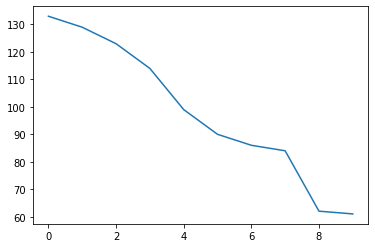

In [12]:
plt.plot(sorted(termFreqs, reverse=True))
plt.show()

In [13]:
DTM = np.array(DT)
DTM

array([[24,  9,  0,  3,  1, 12,  0,  1, 21,  2],
       [32,  5,  3,  0,  0,  2,  0,  0, 10,  0],
       [12,  5,  0,  0,  0,  0,  0,  0, 16,  0],
       [ 6,  2,  0,  0,  0,  0,  0,  0,  7,  2],
       [43, 20,  3,  0,  0, 27,  0,  2, 31,  0],
       [ 2,  0,  7, 16, 33,  0, 18,  0,  0, 27],
       [ 0,  1, 12,  0,  2,  0, 32,  0,  0,  4],
       [ 3,  0,  4,  2,  0,  0, 22,  0,  0,  2],
       [ 1,  0, 27, 25,  7,  0, 34,  3,  0, 11],
       [ 6,  0,  4, 23, 12, 22, 17,  9,  0,  8],
       [ 4, 27,  0,  7, 14,  9,  0, 27,  0, 33],
       [ 0, 14,  1, 12,  5,  4,  0,  7,  0, 16],
       [ 0,  3,  0, 21, 12,  0,  0,  5,  0, 14],
       [ 0,  2,  0,  3,  4,  5,  0,  4,  1,  7],
       [ 0, 11,  0,  2,  0,  3,  0,  4,  0,  3]], dtype=int64)

In [14]:
def knn_search(x, D, K, measure):
    """ find K nearest neighbors of an instance x among the instances in D """
    if measure == 0:
        #到其它点的欧氏距离
        dists = np.sqrt(((D - x)**2).sum(axis=1))
    elif measure == 1:
        # 首先找出D中每个实例的向量范数以及向量x的范数
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        #计算余弦:将点积ox和D中的每个实例除以两个范数的乘积
        sims = np.dot(D,x)/(D_norm * x_norm)
        # 距离度量将是余弦相似度的倒数
        dists = 1 - sims
    idx = np.argsort(dists) # sorting
    # 返回K个最近邻居的索引
    return idx[:K], dists

In [15]:
x = np.array([3, 22, 0, 17, 9, 6, 1, 12, 0, 22])
x

array([ 3, 22,  0, 17,  9,  6,  1, 12,  0, 22])

In [17]:
neigh_idx, distances = knn_search(x, DTM, 5, 1)# 用余弦相似度的倒数作为距离度量，求出k=5个最近邻
neigh_idx

array([11, 10, 13, 14, 12], dtype=int64)

In [18]:
distances = pd.Series(distances, index=DT.index)
distances

0     0.669527
1     0.836397
2     0.818826
3     0.718808
4     0.692761
5     0.386637
6     0.881295
7     0.877364
8     0.603925
9     0.400426
10    0.069511
11    0.007385
12    0.194400
13    0.152276
14    0.172249
dtype: float64

In [19]:
print("Query:", x)
print("\nNeighbors:")
DT.iloc[neigh_idx]

Query: [ 3 22  0 17  9  6  1 12  0 22]

Neighbors:


,0,1,2,3,4,5,6,7,8,9
11,0,14,1,12,5,4,0,7,0,16
10,4,27,0,7,14,9,0,27,0,33
13,0,2,0,3,4,5,0,4,1,7
14,0,11,0,2,0,3,0,4,0,3
12,0,3,0,21,12,0,0,5,0,14


In [21]:
#用欧几里得距离度量求k=5的近邻
neigh_idx, distances = knn_search(x, DTM, 5, 0)
print(neigh_idx)

[11 10 12 14 13]


In [22]:
distances = pd.Series(distances, index=DT.index)
distances

0     43.231933
1     47.476310
2     40.755368
3     37.536649
4     63.007936
5     40.062451
6     48.959167
7     42.743421
8     51.107729
9     35.651087
10    22.516660
11    13.453624
12    23.345235
13    30.364453
14    29.512709
dtype: float64

In [23]:
print("Query:", x)
print("\nNeighbors:")
DT.iloc[neigh_idx]

Query: [ 3 22  0 17  9  6  1 12  0 22]

Neighbors:


,0,1,2,3,4,5,6,7,8,9
11,0,14,1,12,5,4,0,7,0,16
10,4,27,0,7,14,9,0,27,0,33
12,0,3,0,21,12,0,0,5,0,14
14,0,11,0,2,0,3,0,4,0,3
13,0,2,0,3,4,5,0,4,1,7
